## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

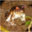

Class name: frogs


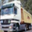

Class name: trucks


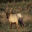

Class name: deer


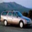

Class name: cars


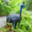

Class name: birds


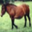

Class name: horses


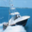

Class name: ships


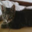

Class name: cats


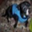

Class name: dogs


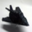

Class name: airplanes


In [3]:
from PIL import Image

i_list = []
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

for i in range(0, len(train_images)-1):
    if train_labels[i] not in i_list:
        img = Image.fromarray(train_images[i])
        img.show()
        img.save("img.png")
        print(f'Class name: {class_names[train_labels[i][0]]}')

        i_list.append(train_labels[i])
        
    if len(i_list) == 10:
        break

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_images_scaled = scaler.fit_transform(train_images.reshape(train_images.shape[0], -1)).reshape(train_images.shape)
test_images_scaled = scaler.fit_transform(test_images.reshape(test_images.shape[0], -1)).reshape(test_images.shape)

In [6]:
# one hot encode target values
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [26]:
# Initialize
classifier = Sequential()

# Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (32, 32, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Flatten
classifier.add(Flatten())

# Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(10, activation = 'sigmoid'))

# Compile
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
history = classifier.fit(train_images_scaled, train_labels,
                         epochs = 10,
                         validation_data = (test_images_scaled, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2874 - accuracy: 0.3215 - val_loss: 0.2236 - val_accuracy: 0.4978
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2179 - accuracy: 0.5105 - val_loss: 0.2107 - val_accuracy: 0.5335
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2050 - accuracy: 0.5454 - val_loss: 0.1990 - val_accuracy: 0.5581
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1948 - accuracy: 0.5703 - val_loss: 0.1958 - val_accuracy: 0.5705
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1879 - accuracy: 0.5875 - val_loss: 0.1921 - val_accuracy: 0.5745
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1799 - accuracy: 0.6103 - val_loss: 0.1883 - val_accuracy: 0.5941
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1744 - accuracy: 0.6254 - val_loss: 0.1855 - val_accuracy:

In [29]:
acc = classifier.evaluate(test_images_scaled, test_labels)
acc

313/313 [==============================] - 1s 2ms/step - loss: 0.1804 - accuracy: 0.6162


[0.18037869036197662, 0.6161999702453613]

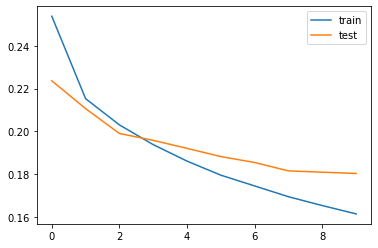

In [28]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()